
<h1 style = 'text-align:center'>FINALS - PROJECT 3<br>DENGUE DATA (Philippines) <br>from 2016 - 2020</h1>
<hr>
<h4 style = 'color:gray'>ANALYST - LOUIEZZY RAMOS </h4> <hr> <hr>

<h1 style="text-align:center; color:blue;">PROJECT SUMMARY</h1>

<h4 style="color:gray;">
    I. CASES x DEATHS PER REGION <br> <br>
    II. (NCR RECORD: 2016 - 2017 rose cases?  
    <br>&nbsp;&nbsp;&nbsp; a. HIGHEST DENGUE CASES RECORD: Region VIII & Region IV-A <br>
    III. CASES PEAKED IN 2019
    <br>&nbsp;&nbsp;&nbsp; a.Dengue Deaths per Region (2019)<br> <br>
    IV. SURVIVAL RATE - REGION IV-A(2019)
    VI. SURVIVAL RATE - PH (2016 - 2019)
    
</h4>

<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("datasets//dengue.csv")
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1020.0,2018.000000,1.414907,2016.0,2017.00,2018.0,2019.00,2020.0
Dengue_Cases,1020.0,1124.926471,1662.608878,10.0,247.75,582.5,1284.25,21658.0
Dengue_Deaths,1020.0,16.513725,96.358215,0.0,1.00,3.0,7.00,1651.0


<h1>FILLING UP NULL VALUES</h1>
<hr>

<h1>Main set of null values:</h1>

In [4]:
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>CHECK DATA TYPES ---> Then CHANGE DATA TYPES </h1>
<hr>

In [5]:
df.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
df['Region'] = df['Region'].astype('category')
df['Year'] = df['Year'].astype('category')
df['Month'] = df['Month'].astype('category')

In [7]:
df.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [8]:
df['Year'].unique()

[2016, 2017, 2018, 2019, 2020]
Categories (5, int64): [2016, 2017, 2018, 2019, 2020]

In [9]:
df_2020 = df[df['Year'] == 2020]
df_2019 = df[df['Year'] == 2019]
df_2018 = df[df['Year'] == 2018]
df_2017 = df[df['Year'] == 2017]
df_2016 = df[df['Year'] == 2016]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   category
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 20.3 KB


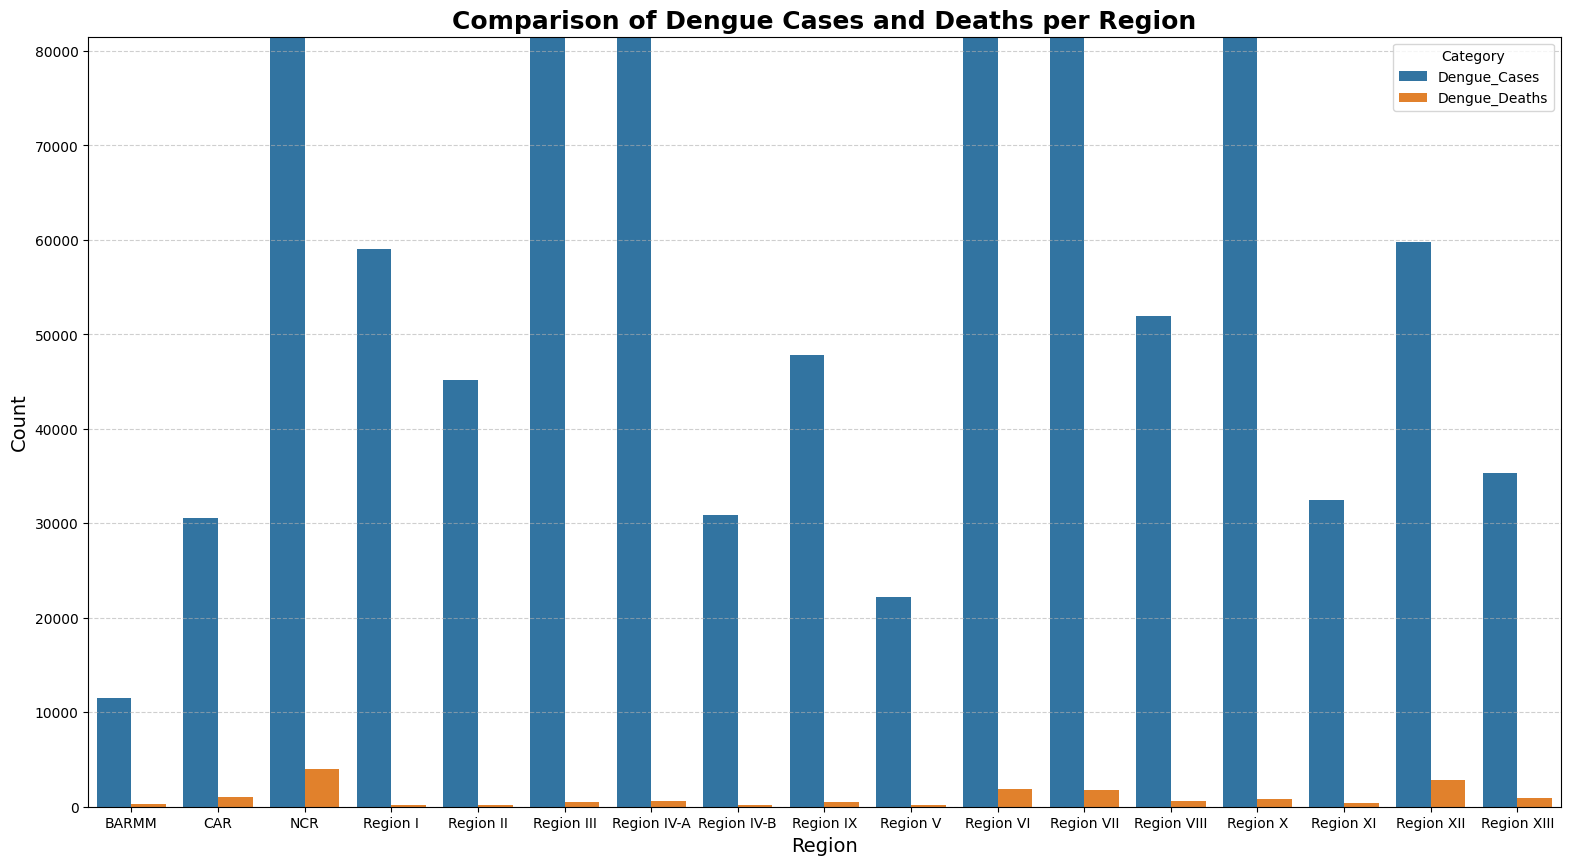

In [30]:


#cases and deaths per region
region_summary = df.groupby("Region")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()

region_melted = region_summary.melt(
    id_vars="Region",
    value_vars=["Dengue_Cases", "Dengue_Deaths"],
    var_name="Category",
    value_name="Count"
)


plt.figure(figsize=(19, 10))
sns.barplot(data=region_melted, x="Region", y="Count", hue="Category")


plt.ylim(0, region_melted["Count"].max() * 0.5)

plt.title("Comparison of Dengue Cases and Deaths per Region", fontsize=18, fontweight='bold')
plt.xlabel("Region", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Category")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


<h3 style="color:gray">INSIGHT 1: (CASES x DEATHS PER REGION) <br>&nbsp;&nbsp;&nbsp;
    With over 80,000 cases reported, Regions III, VI, and VII had the highest dengue case counts.
 These regions are frequently included in national studies as having one of the highest dengue burdens in the nation; this is probably because of their sizable populations, crowded cities, and ideal mosquito habitats.</h3>


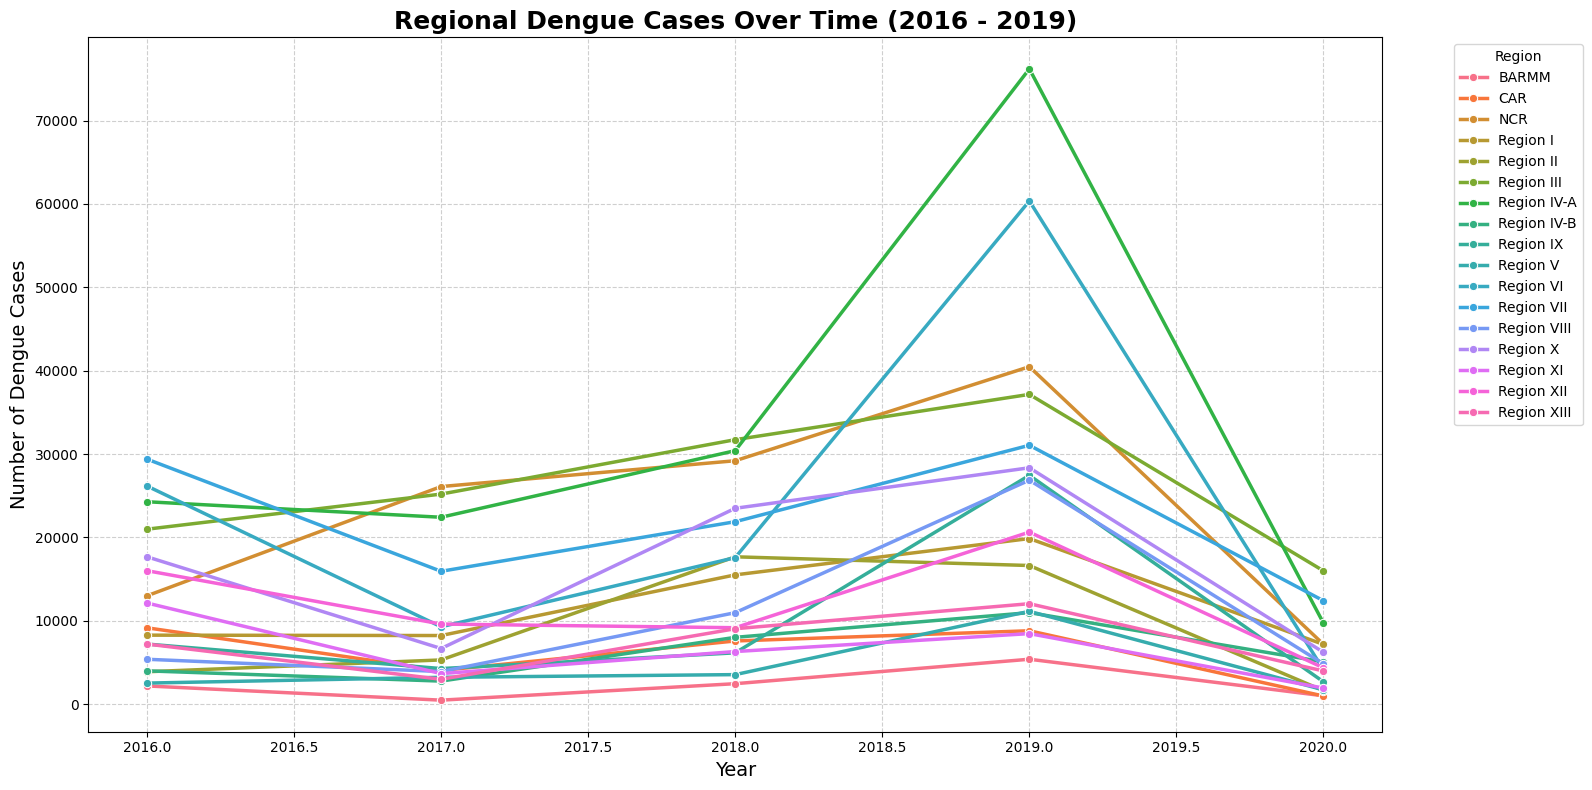

In [29]:

#data by Year and Region
region_trend = df.groupby(["Year", "Region"])[["Dengue_Cases"]].sum().reset_index()

#multi-line plot
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=region_trend,
    x="Year",
    y="Dengue_Cases",
    hue="Region",
    marker="o",
    linewidth=2.5
)

plt.title("Regional Dengue Cases Over Time (2016 - 2019)", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Dengue Cases", fontsize=14)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<h3 style="color:gray">INSIGHT 2: (NCR RECORD: 2016 - 2017 rose cases?) <br>&nbsp;&nbsp;&nbsp;
    As can be seen in the above picture, all regions recorded fewer cases in 2017 than they did in 2016, <b>with the exception of the NCR region, which had an increase in cases.</b> From January 1 to July 1, 2017, there were 43,770 dengue cases nationally, as reported to the Department of Health (DOH). This is 36.8% fewer than the 69,297 cases that occurred during the same time in 2016. In line with the same DOH reports, every region exhibited declining trends during that time, with the exception of Metro Manila (NCR), where the number of cases increased by 24.9% over the same period in 2016.</h3>


<h3 style="color:gray">INSIGHT 3: (HIGHEST DENGUE CASES RECORD: Region VIII & Region IV-A) <br>&nbsp;&nbsp;&nbsp;
    Throughout the years 2016–2020, dengue cases in Regions VII and IV-A showed recurrent surges, indicating the existence of recurrent epidemic patterns. This steady variation suggests that these areas might experience ongoing dengue transmission factors, like conducive mosquito breeding grounds, dense populations, or environmental circumstances that encourage frequent case recurrence.</h3>


<h3 style="color:gray">INSIGHT 4: (CASES PEAKED IN YEAR 2019)<br>&nbsp;&nbsp;&nbsp;
    <b>In 2019, the Philippines faced a major nationwide dengue outbreak</b>, with hundreds of thousands of infections and over a thousand fatalities, leading the Department of Health (DOH) to officially declare a national dengue epidemic. This sharp rise mirrored a global increase in dengue cases that same year. Favorable weather patterns, including intense rainfall and warmer temperatures, created ideal conditions for mosquito breeding and accelerated viral transmission.</h3>


<h2>
    As year 2019 recorded the highest value of dengue cases and death. Here is the visualization during this time.<br>
</h2>

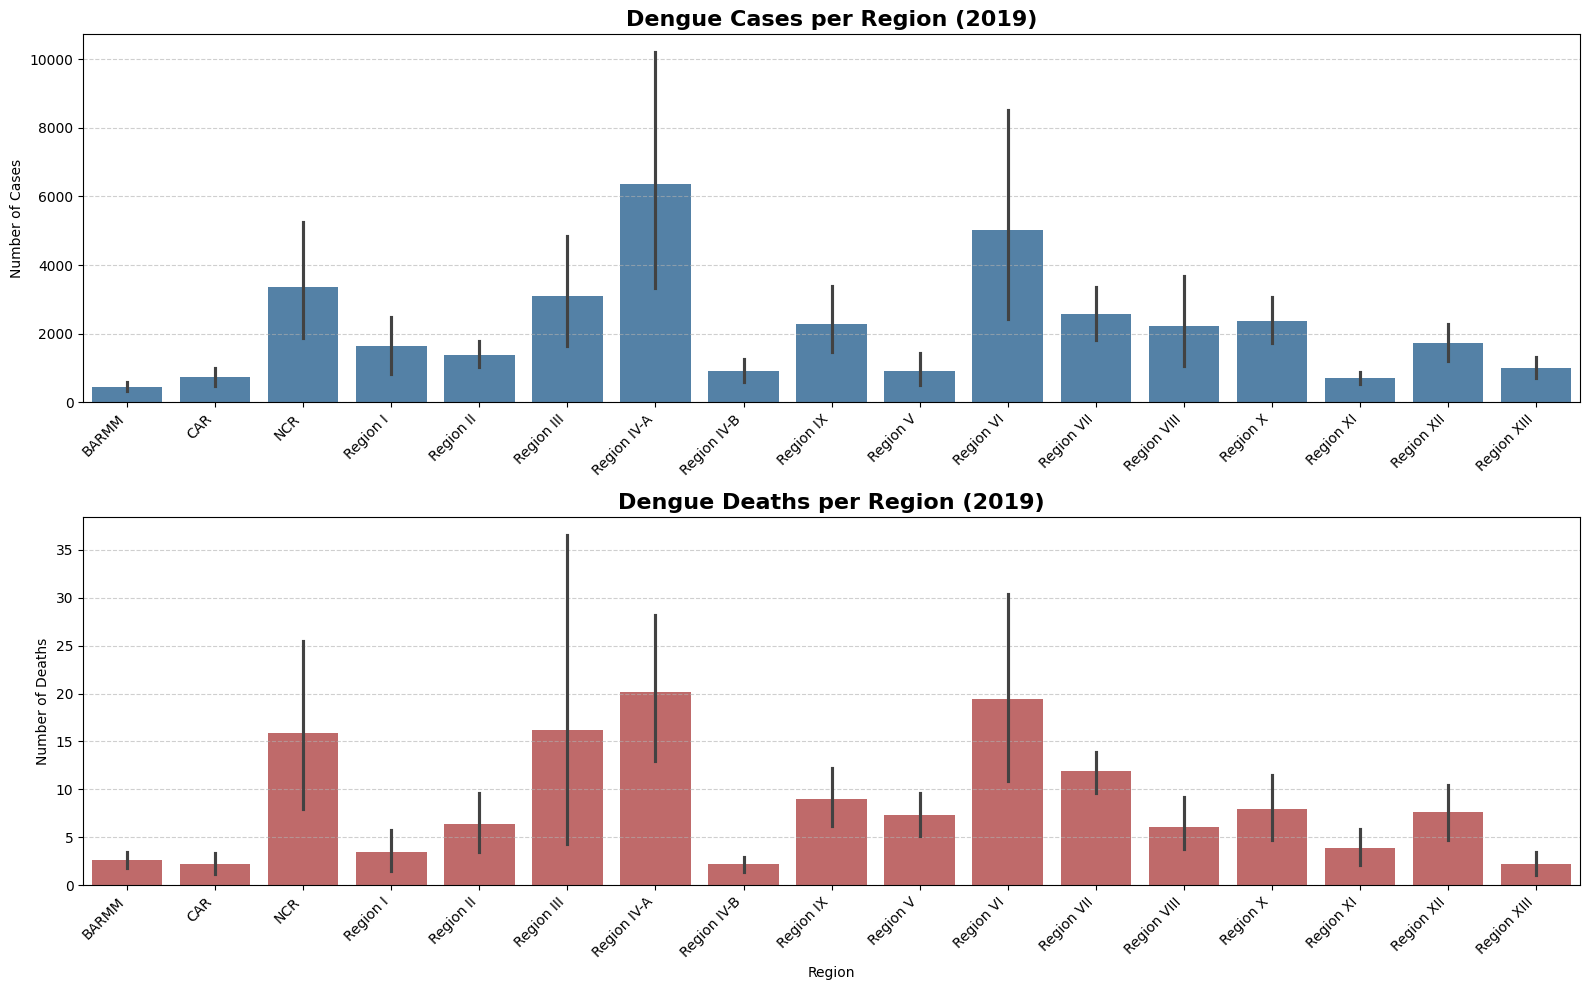

In [33]:
df_2019 = df[df['Year'] == 2019].sort_values(by='Dengue_Cases', ascending=False)


plt.figure(figsize=(16,10))

#Dengue Cases
plt.subplot(2, 1, 1)
sns.barplot(data=df_2019, x='Region', y='Dengue_Cases', color='steelblue')
plt.title('Dengue Cases per Region (2019)', fontsize=16, fontweight='bold')
plt.ylabel('Number of Cases')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

#Dengue Deaths
plt.subplot(2, 1, 2)
sns.barplot(data=df_2019, x='Region', y='Dengue_Deaths', color='indianred')
plt.title('Dengue Deaths per Region (2019)', fontsize=16, fontweight='bold')
plt.ylabel('Number of Deaths')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<h3 style="color:gray">INSIGHT 5: (2019)<br>&nbsp;&nbsp;&nbsp;
    According to the 2019 data, the Philippines' dengue case and fatality rates were highest in Regions IV-A, VI, NCR, and III. This shows that case volume and mortality are <b>strongly positively correlated</b>; areas with greater infection rates also had higher death tolls. This pattern implies that high transmission intensity probably put a pressure on local healthcare systems, which in turn led to a higher death toll.</h3>


In [37]:
df_2019 = df[df['Year'] == 2019]


df_2019_totals = df_2019.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()


df_2019_totals = df_2019_totals.sort_values(by='Dengue_Cases', ascending=False)


print("Total Dengue Cases and Deaths per Region (2019):")
print(df_2019_totals.to_string(index=False))


total_cases_2019 = df_2019_totals['Dengue_Cases'].sum()
total_deaths_2019 = df_2019_totals['Dengue_Deaths'].sum()

print(f"Total Dengue Cases: {total_cases_2019:,}")
print(f"Total Dengue Deaths: {total_deaths_2019:,}")

Total Dengue Cases and Deaths per Region (2019):
     Region  Dengue_Cases  Dengue_Deaths
Region IV-A         76195            242
  Region VI         60357            233
        NCR         40478            190
 Region III         37158            194
 Region VII         31053            143
   Region X         28356             95
  Region IX         27447            108
Region VIII         26871             73
 Region XII         20640             91
   Region I         19867             42
  Region II         16634             77
Region XIII         12054             27
   Region V         11141             88
Region IV-B         10984             26
        CAR          8808             27
  Region XI          8466             46
      BARMM          5393             31
Total Dengue Cases: 441,902
Total Dengue Deaths: 1,733


<h3 style="color:gray">
INSIGHT 6: (2019)<br>&nbsp;&nbsp;&nbsp;
Recorded a total of <b>441,902 dengue cases</b> and <b>1,733 deaths</b>, marking one of the most severe national outbreaks in recent years. <br><br>

<ul>
  <li><b>Region IV-A (CALABARZON)</b> recorded <b>76,195 cases</b> and <b>242 deaths</b>, representing <b>17.2%</b> of all cases and <b>14.0%</b> of all deaths.</li>
  <li><b>Region VI (Western Visayas)</b> followed with <b>60,357 cases</b> and <b>233 deaths</b>, contributing <b>13.7%</b> of total cases and <b>13.4%</b> of total deaths.</li>
  <li><b>NCR (Metro Manila)</b> had <b>40,478 cases</b> and <b>190 deaths</b>, or <b>9.2%</b> of total cases and <b>11.0%</b> of total deaths.</li>
  <li><b>Region III (Central Luzon)</b> registered <b>37,158 cases</b> and <b>194 deaths</b>, making up <b>8.4%</b> of cases and <b>11.2%</b> of deaths.</li>
</ul>
</h3>

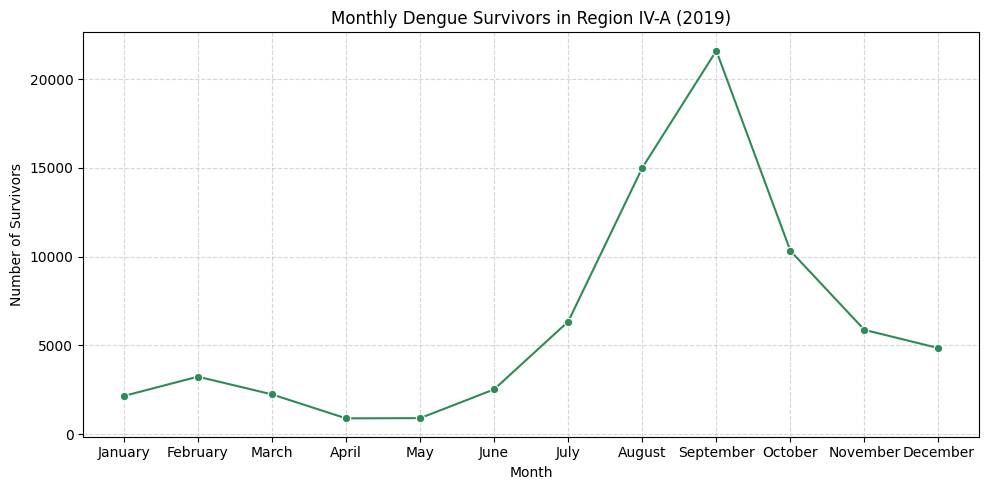

Total Survivors in Region IV-A (2019): 75,953
Survival Rate: 99.68%


In [43]:
iva_2019 = df[(df['Region'] == 'Region IV-A') & (df['Year'] == 2019)]


iva_monthly = iva_2019.groupby('Month')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
iva_monthly['Survivors'] = iva_monthly['Dengue_Cases'] - iva_monthly['Dengue_Deaths']


plt.figure(figsize=(10,5))
sns.lineplot(data=iva_monthly, x='Month', y='Survivors', marker='o', color='seagreen')
plt.title('Monthly Dengue Survivors in Region IV-A (2019)')
plt.xlabel('Month')
plt.ylabel('Number of Survivors')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


total_cases = iva_monthly['Dengue_Cases'].sum()
total_survivors = iva_monthly['Survivors'].sum()
survival_rate = (total_survivors / total_cases) * 100

print(f"Total Survivors in Region IV-A (2019): {total_survivors:,}")
print(f"Survival Rate: {survival_rate:.2f}%")

<h3 style="color:gray">INSIGHT 7: (SURVIVAL RATE)<br>&nbsp;&nbsp;&nbsp;
    The dengue survivor pattern in Region IV-A in 2019 followed the outbreak curve, peaking in July and August and then declining toward the end of the year.  Almost 75,953 people (almost 99.7%) survived out of the 76,195 cases that were documented, showing that even with the high number of cases, the fatality rate was low, most likely as a result of better disease identification and more effective treatment.</h3>


<h3 style="color:gray">INSIGHT 8: (NOTE!)<br>&nbsp;&nbsp;&nbsp;
    The line graph's lower points for a given month may not necessarily correspond to a lower dengue case survival rate.  Rather, they represent months with a lower total number of instances reported.  Put another way, it seemed like there were fewer survivors when there were fewer cases.  This implies that variations in case volume, rather than variations in treatment efficacy or death rates, are the main causes of graph oscillations.</h3>


Dengue Survival Rate per Year (Philippines):
Year  Survival_Rate (%)
2016          96.121578
2017          97.039992
2018          99.511131
2019          99.607832
2020          98.687405


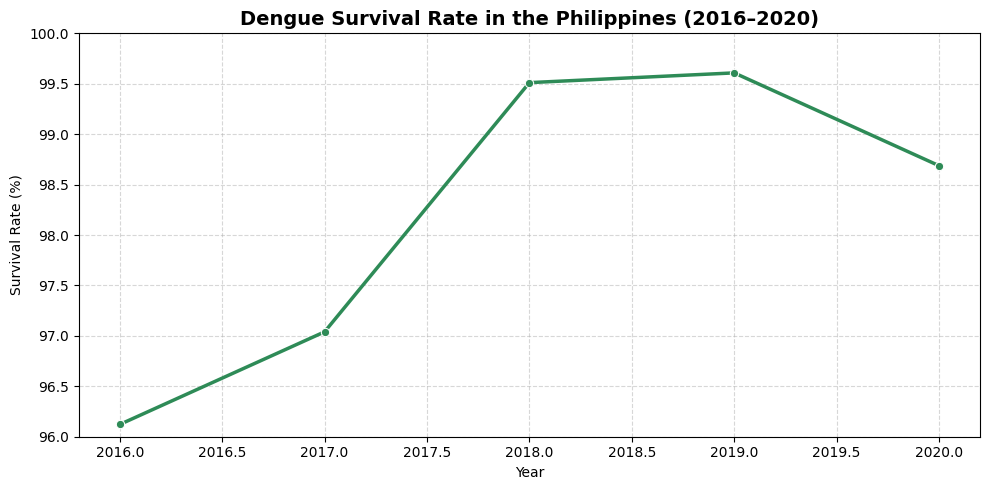

In [45]:
yearly = df.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()


yearly['Survival_Rate (%)'] = ((yearly['Dengue_Cases'] - yearly['Dengue_Deaths']) / yearly['Dengue_Cases']) * 100

print("Dengue Survival Rate per Year (Philippines):")
print(yearly[['Year', 'Survival_Rate (%)']].to_string(index=False))


plt.figure(figsize=(10,5))
sns.lineplot(data=yearly, x='Year', y='Survival_Rate (%)', marker='o', color='seagreen', linewidth=2.5)
plt.title('Dengue Survival Rate in the Philippines (2016–2020)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Survival Rate (%)')
plt.ylim(96, 100)  
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h3 style="color:gray">INSIGHT 9: <br>&nbsp;&nbsp;&nbsp;
    A 3.5 percentage point improvement in the survival rate occurred between 2016 (96.1%) and 2019 (99.6%).
 This development points to improved access to healthcare, improved public health response, and perhaps quicker case identification and reporting systems over time.</h3>


<h3 style="color:gray">INSIGHT 10: <br>&nbsp;&nbsp;&nbsp;
    With nearly 441,000 cases, 2019 saw the largest nationwide dengue outbreak; yet, the survival rate was still the greatest during that time, at 99.6%.
 This suggests that even during epidemic conditions, hospital capacity, awareness campaigns, and treatment protocols were successful in averting mortality, as evidenced by the fact that fatalities were minimized even when case volume rose.</h3>
